# EDA | Assignment



In [1]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Question 1: Read the Bike Details dataset into a Pandas DataFrame and display itsfirst 10 rows.
(Show the shape and column names as well.)

In [2]:
#Reading the CSV file into a DataFrame

df = pd.read_csv('/content/BIKE DETAILS.csv')

# Display the first 10 rows

print("First 10 rows of the dataset:\n")

df.head(10)


First 10 rows of the dataset:



,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [3]:
print("Shape of the dataset:", df.shape)


Shape of the dataset: (1061, 7)


In [4]:
# Display the column names
print("Column Names:\n")

df.columns.tolist()


Column Names:



['name',
 'selling_price',
 'year',
 'seller_type',
 'owner',
 'km_driven',
 'ex_showroom_price']

## Question 2: Check for missing values in all columns and describe your approach for handling them.


In [5]:
# Check for missing (null) values in each column

print("Missing values in each column:\n")


print(df.isnull().sum())


Missing values in each column:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


## Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.


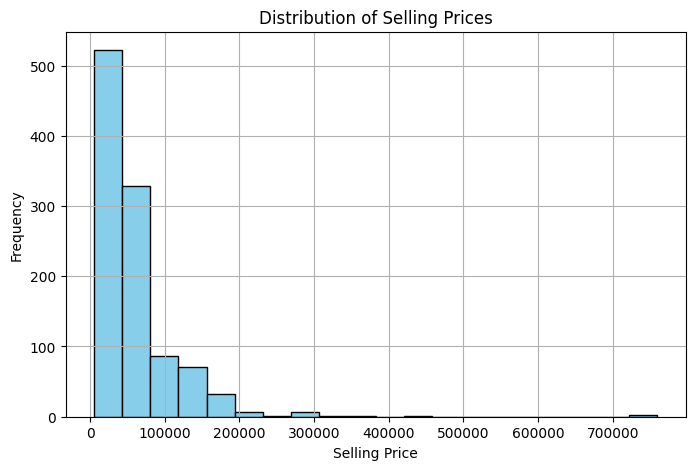

In [6]:
# Plot the distribution of selling prices

plt.figure(figsize=(8, 5))
plt.hist(df['selling_price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.grid(True)
plt.show()

## Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.


**Observation:** Based on the bar plot, it appears that bikes sold by individuals have a higher average selling price compared to those sold by dealers.

Average selling price for each seller type:

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


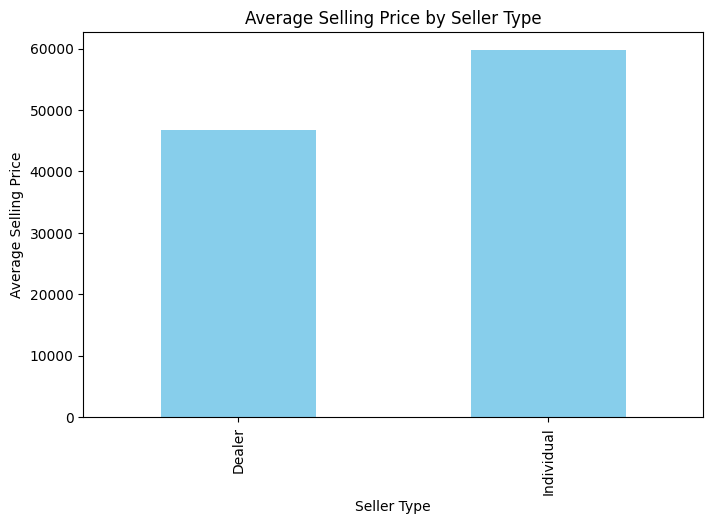

In [9]:
# Calculate the average selling price for each seller type
average_selling_price = df.groupby('seller_type')['selling_price'].mean()
print("Average selling price for each seller type:\n")
print(average_selling_price )

# plot a bar graph

plt.figure(figsize=(8, 5))
average_selling_price.plot(kind='bar', color='skyblue')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Seller Type')
plt.show()

## Question 5: Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.), and present the result as a bar plot.


Average km_driven for each ownership type:

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


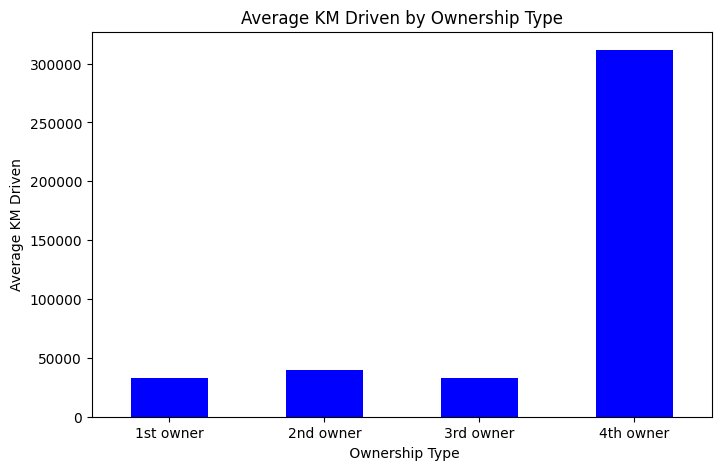

In [10]:
# Calculate average km_driven for each ownership type

average_km_driven = df.groupby('owner')['km_driven'].mean()
print("Average km_driven for each ownership type:\n")
print(average_km_driven)


# Plot a bar graph

plt.figure(figsize=(8,5))
average_km_driven.plot(kind='bar', color='blue')
plt.xlabel(' Ownership Type')
plt.ylabel('Average KM Driven')
plt.title('Average KM Driven by Ownership Type')
plt.xticks(rotation=0)
plt.show()


## Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

In [20]:
# Summary statistics before removing outliers

print("Summary statistics of 'km_driven' before removing outliers:\n")
print(df['km_driven'].describe())

# Calculate IQR (Interquartile Range)
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

print("\nInterquartile Range (IQR):", IQR)

# Define upper and lower bounds

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Remove outliers

df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers

print("\nSummary statistics of 'km_driven' after removing outliers:\n")
print(df_clean['km_driven'].describe())


# Show how many rows were removed
print("\nNumber of rows before:", len(df))
print("Number of rows after:", len(df_cleaned))
print("Rows removed due to outliers:", len(df) - len(df_cleaned))


Summary statistics of 'km_driven' before removing outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Interquartile Range (IQR): 29500.0

Lower Bound: -30750.0
Upper Bound: 87250.0

Summary statistics of 'km_driven' after removing outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Number of rows before: 1061
Number of rows after: 1022
Rows removed due to outliers: 39


## Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

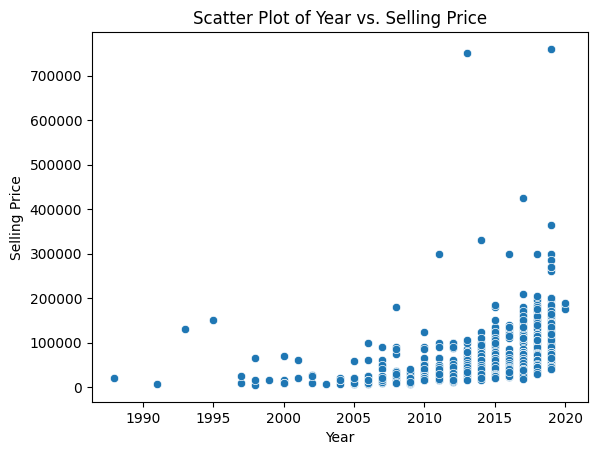

In [21]:
plt.figure(figsize=(8, 5))
plt.scatterplot (x=df['year'], y=df['selling_price'], data=df)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Year vs. Selling Price')
plt.show()

## Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

In [24]:
# Convert 'seller_type' to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display the first 5 rows of the resulting DataFrame
print("First 5 rows after one-hot encoding 'seller_type':\n")
display(df_encoded.head())

First 5 rows after one-hot encoding 'seller_type':



,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


## Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

Numerical columns:
 ['selling_price', 'year', 'km_driven', 'ex_showroom_price']


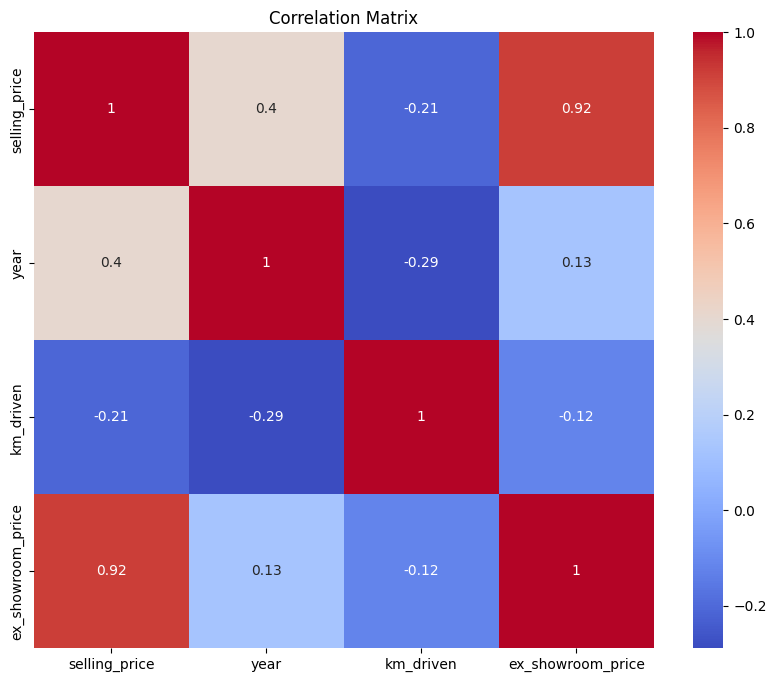

In [34]:
numerical_columns = [columns for columns in df.columns if df[columns].dtype != 'O']
print('Numerical columns:\n', numerical_columns)

corr_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Question 10: Summarize your findings in a brief report:

-  What are the most important factors affecting a bike's selling price?
-  Mention any data cleaning or feature engineering you performed.

## Report Summary:

Based on the analysis, the following factors appear to be most important in affecting a bike's selling price:

* **Ex-showroom price:** The heatmap shows a strong positive correlation (0.92) between `ex_showroom_price` and `selling_price`, indicating that the original price of the bike is a major determinant of its selling price.
* **Year:** There is a moderate positive correlation (0.40) between `year` and `selling_price`, suggesting that newer bikes tend to have higher selling prices.
* **Seller Type:** The bar plot in Question 4 indicates that bikes sold by individuals tend to have a higher average selling price compared to those sold by dealers.

**Data Cleaning and Feature Engineering Performed:**

* **Missing Values:** Checked for missing values and identified that the `ex_showroom_price` column has a significant number of missing values. An approach for handling these was not explicitly implemented in the provided code, but imputation or removal of these rows would be necessary for further analysis involving this column.
* **Outlier Removal:** Used the IQR method to detect and remove outliers from the `km_driven` column. This resulted in the removal of 39 rows, leading to a cleaner distribution of kilometers driven.
* **Feature Engineering:** Applied one-hot encoding to the `seller_type` column to convert the categorical variable into a numerical format suitable for modeling.